<a href="https://colab.research.google.com/github/Alisher452/Alisher452/blob/main/%D0%98%D0%B5%D1%80%D0%B0%D1%80%D1%85%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/data.csv')  # Читаем данные из загруженной базы

df #эта команда наглядно выведет таблицу

<ipython-input-5-bca69f755a6a>:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/data.csv')  # Читаем данные из загруженной базы


,id,class,c1,c2,c3,c4,c5,c6,c7,c8,...,c53,c54,c55,c56,c57,c58,c59,c60,created_at,updated_at
0,1,545988074,0,0,0,правое,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,545988074,0,0,0,правое,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,647859449,1014559500,33652,-1898910370,левое,9,50.0,14,953176870.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,647859449,1017330063,33655,-645229505,левое,Не предъявляется,50.0,14,-699300431.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,647859449,1482170768,1017353208,-826554069,левое,Не предъявляется,50.0,14,953176870.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15398,15399,545988074,67530697,1040736,0,левое,100,150.0,NaN,0.0,...,NaN,1034116331,Т,К,Э,NaN,л,(РЕ),NaN,NaN
15399,15400,545988074,1387651697,1040736,0,левое,100,200.0,NaN,0.0,...,NaN,1034116331,Т,NaN,NaN,Э,л,(РЕ),NaN,NaN
15400,15401,545988074,67530697,1040736,0,левое,100,200.0,NaN,0.0,...,NaN,1034116331,Т,К,NaN,Э,л,(РЕ),NaN,NaN
15401,15402,545988074,1387651697,1040736,0,левое,100,200.0,NaN,0.0,...,NaN,1034116331,Т,NaN,Э,Э,л,(РЕ),NaN,NaN


In [6]:
df.shape # Посмотрим сколько у нас строк и сколько столбцов в датасете

(15403, 64)

In [7]:
df = df.fillna(0)# Для работы с датасетом заменим все значения NaN на нули
df

,id,class,c1,c2,c3,c4,c5,c6,c7,c8,...,c53,c54,c55,c56,c57,c58,c59,c60,created_at,updated_at
0,1,545988074,0,0,0,правое,0,0.0,0,0.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
1,2,545988074,0,0,0,правое,0,0.0,0,0.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
2,3,647859449,1014559500,33652,-1898910370,левое,9,50.0,14,953176870.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
3,4,647859449,1017330063,33655,-645229505,левое,Не предъявляется,50.0,14,-699300431.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
4,5,647859449,1482170768,1017353208,-826554069,левое,Не предъявляется,50.0,14,953176870.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15398,15399,545988074,67530697,1040736,0,левое,100,150.0,0,0.0,...,0.0,1034116331,Т,К,Э,0,л,(РЕ),0.0,0.0
15399,15400,545988074,1387651697,1040736,0,левое,100,200.0,0,0.0,...,0.0,1034116331,Т,0,0,Э,л,(РЕ),0.0,0.0
15400,15401,545988074,67530697,1040736,0,левое,100,200.0,0,0.0,...,0.0,1034116331,Т,К,0,Э,л,(РЕ),0.0,0.0
15401,15402,545988074,1387651697,1040736,0,левое,100,200.0,0,0.0,...,0.0,1034116331,Т,0,Э,Э,л,(РЕ),0.0,0.0


In [8]:
df.info()# Выводим всю информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15403 non-null  int64  
 1   class       15403 non-null  int64  
 2   c1          15403 non-null  int64  
 3   c2          15403 non-null  int64  
 4   c3          15403 non-null  int64  
 5   c4          15403 non-null  object 
 6   c5          15403 non-null  object 
 7   c6          15403 non-null  float64
 8   c7          15403 non-null  object 
 9   c8          15403 non-null  float64
 10  c9          15403 non-null  int64  
 11  c10         15403 non-null  float64
 12  c11         15403 non-null  float64
 13  c12         15403 non-null  object 
 14  c13         15403 non-null  float64
 15  c14         15403 non-null  object 
 16  c15         15403 non-null  object 
 17  c16         15403 non-null  float64
 18  c17         15403 non-null  object 
 19  c18         15403 non-nul

In [9]:
df.describe().transpose() # статистика распределения значений всего нашего датасета

,count,mean,std,min,25%,50%,75%,max
id,15403.0,7.702000e+03,4.446607e+03,1.000000e+00,3.851500e+03,7.702000e+03,1.155250e+04,1.540300e+04
class,15403.0,5.462592e+08,5.249002e+06,5.459881e+08,5.459881e+08,5.459881e+08,5.459881e+08,6.478594e+08
c1,15403.0,-1.707668e+07,1.246947e+09,-2.143199e+09,-1.061392e+09,-9.869584e+06,1.063638e+09,2.142976e+09
c2,15403.0,1.434529e+06,2.005542e+07,0.000000e+00,1.040736e+06,1.040736e+06,1.040736e+06,1.017353e+09
c3,15403.0,-1.861000e+06,4.946583e+07,-1.898910e+09,0.000000e+00,0.000000e+00,0.000000e+00,6.346628e+08
c6,15403.0,2.006233e+02,4.980746e+01,0.000000e+00,1.500000e+02,2.000000e+02,2.500000e+02,2.000000e+03
c8,15403.0,2.230546e+05,4.970944e+07,-6.993004e+08,0.000000e+00,0.000000e+00,0.000000e+00,1.756160e+09
c9,15403.0,1.761597e+06,3.834631e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.204267e+09
c10,15403.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
c11,15403.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [10]:
df.nunique()# Посмотрим сколько разновидностей значений имеют каждый из столбцов нашего датафрейма

id            15403
class             2
c1             1962
c2                6
c3                5
              ...  
c58               2
c59               2
c60               2
created_at        1
updated_at        1
Length: 64, dtype: int64

In [11]:
df.columns #ниже выводится список столбцов

Index(['id', 'class', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19',
       'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29',
       'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39',
       'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49',
       'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59',
       'c60', 'created_at', 'updated_at'],
      dtype='object')

In [12]:
df.id.drop_duplicates().count(),df.id.count()# Посмотрим не дублируются-ли значения

(15403, 15403)

In [13]:
# Посмотрим на список всех уникальных значений
df[['class','c1','c2','c3','c6','c22','c23','c28','c36','c40','c41','c43','c46','c49','c50','c51']].drop_duplicates()

,class,c1,c2,c3,c6,c22,c23,c28,c36,c40,c41,c43,c46,c49,c50,c51
0,545988074,0,0,0,0.0,0.0,0.85,0.0,0.0,0.0,0.0,18,0.0,16.0,0.0,0.0
2,647859449,1014559500,33652,-1898910370,50.0,7.0,0.52,0.0,0.0,1.0,0.0,18,12.0,6.0,0.0,0.0
3,647859449,1017330063,33655,-645229505,50.0,49.0,0.32,0.0,0.0,1.0,0.0,18,12.0,6.0,12.0,0.0
4,647859449,1482170768,1017353208,-826554069,50.0,19.0,0.32,0.0,0.0,1.0,0.0,18,12.0,6.0,0.0,0.0
5,647859449,-1568968858,1044374,634662849,250.0,570.0,0.71,1.0,8.0,1.0,2.0,18,12.0,6.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15291,545988074,1219700153,1040736,0,200.0,6.0,0.11,0.0,0.0,3.0,0.0,18,30.0,0.0,0.0,0.0
15293,545988074,1735104434,1040736,0,200.0,6.0,0.11,0.0,0.0,3.0,0.0,18,30.0,0.0,0.0,0.0
15295,545988074,-2045871003,1040736,0,200.0,6.0,0.11,0.0,0.0,3.0,0.0,18,30.0,0.0,0.0,0.0
15297,545988074,280620670,1040736,0,200.0,6.0,0.11,0.0,0.0,3.0,0.0,18,30.0,0.0,0.0,0.0


In [14]:
col=['class','c1','c2']
# столбцы (int, float),по которым выполним кластеризацию

In [15]:
pd.options.mode.chained_assignment = None
df[col].fillna(0, inplace=True) # заменим пропуски данных нулями, в противном случае выдаст ошибку

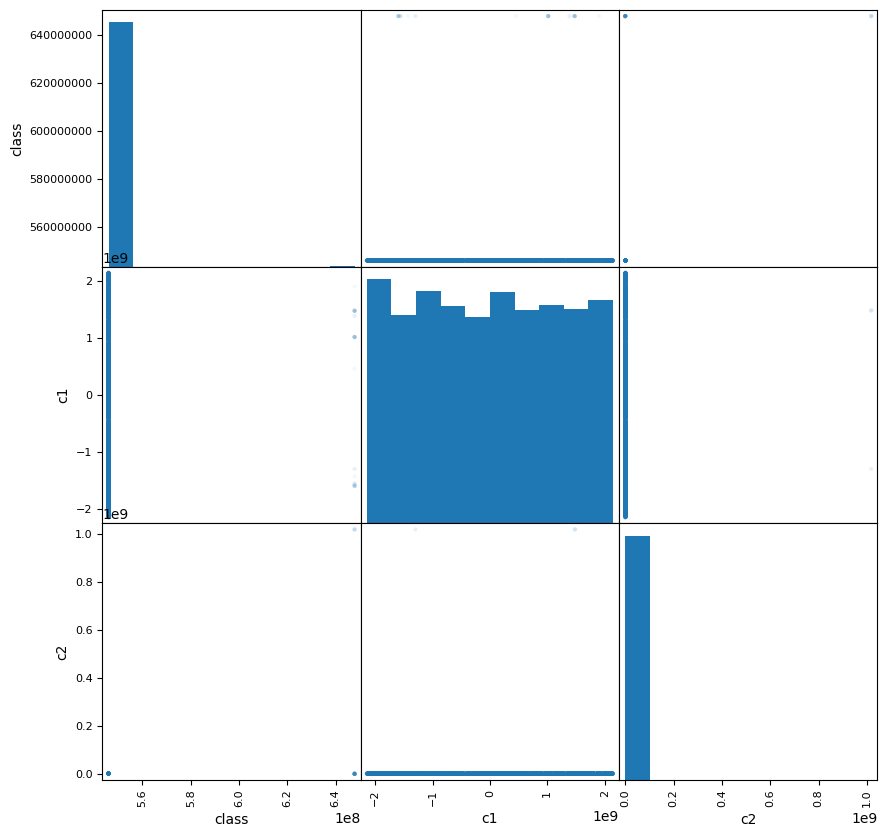

In [16]:
# матрица рассеяния и гистограммы
from pandas.plotting import scatter_matrix
scatter_matrix(df[col], alpha=0.05, figsize=(10, 10));

In [17]:
df[col].corr()# Получим поэлементную корреляцию для столбцов с числовым значением,для установления взаимосвязи между столбцами

,class,c1,c2
class,1.000000,0.010354,0.380217
c1,0.010354,1.000000,0.009030
c2,0.380217,0.009030,1.000000


In [18]:
# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведен данные к нормальным значениям
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)

In [19]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в
# специальной переменной (используется ниже для визуализации
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

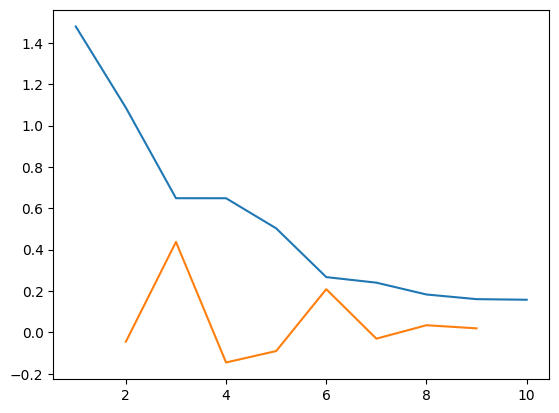

Рекомендованное количество кластеров: 3


In [20]:
# Метод локтя. Позволяет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)
acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("Рекомендованное количество кластеров:", k)

In [21]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [22]:
nClust=3 #количество кластеров

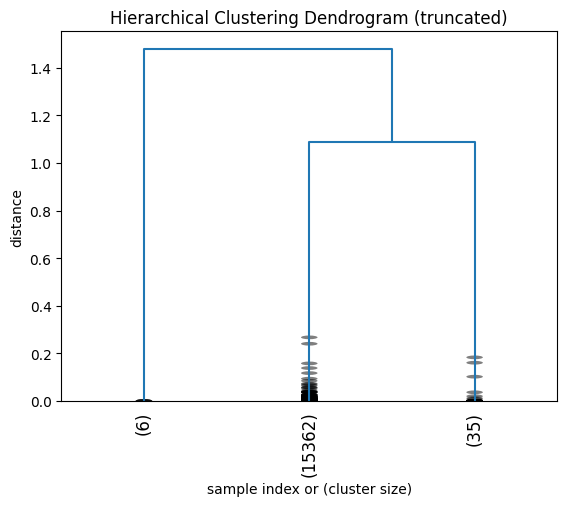

In [23]:
#строим дендрограмму иерархического агломеративного кластерного анализа
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [24]:
# Для читабельности нашей дендограммы выведем имена столбцов по номеру индекса,которые указаны в дендограмме
print(df.columns[6])
print(df.columns[35])

c5
c34


Как мы видим,на нашей дендрограмме указываются номера объединяемых объектов и расстояние (или иная мера сходства), при котором произошло объединение
Дендрограмма на рисунке показывает, что в данном случае на первом шаге были объединены в один кластер объекты с5(индекс столбца-6) и с34(индекс столбца-35).Расстояние между ними 0,5.

In [25]:
# иерархическая кластеризация
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([2, 2, 3, ..., 2, 2, 2], dtype=int32)

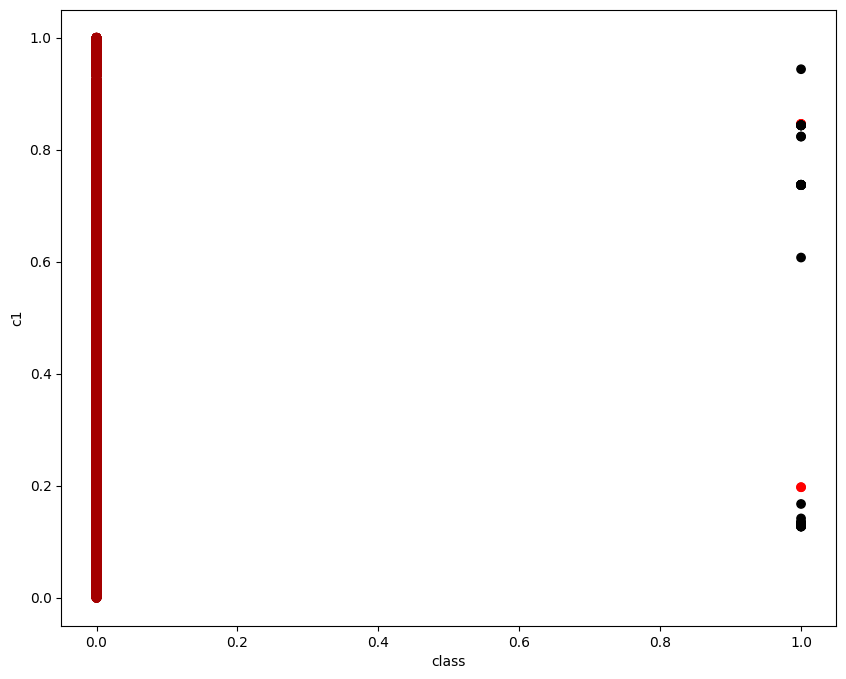

In [26]:
x=0 # диаграмма в разных осях
y=1
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [27]:
# к оригинальным данным добавляем номер кластера
df['I']=clusters
res=df.groupby('I')[col].mean()
res['Количество']=df.groupby('I').size().values
res #ниже средние цифры по кластерам и количество объектов (Количество)

,class,c1,c2,Количество
I,,,,
1,647859449.0,5.556680e+08,1.017353e+09,6
2,545988074.0,-1.774367e+07,1.040601e+06,15362
3,647859449.0,1.774916e+08,1.780429e+05,35


In [28]:
df[df['I']== 1] # номер кластера


,id,class,c1,c2,c3,c4,c5,c6,c7,c8,...,c54,c55,c56,c57,c58,c59,c60,created_at,updated_at,I
4,5,647859449,1482170768,1017353208,-826554069,левое,Не предъявляется,50.0,14,953176870.0,...,0,0,0,0,0,0,0,0.0,0.0,1
12,13,647859449,1482171729,1017353208,-826554069,левое,Не предъявляется,50.0,23,953176870.0,...,0,0,0,0,0,0,0,0.0,0.0,1
15,16,647859449,1482173646,1017353208,-826554069,левое,Не предъявляется,50.0,36,953176870.0,...,0,0,0,0,0,0,0,0.0,0.0,1
18,19,647859449,1482175568,1017353208,-826554069,левое,Не предъявляется,50.0,54,953176870.0,...,0,0,0,0,0,0,0,0.0,0.0,1
21,22,647859449,-1297344695,1017353208,-826554069,левое,Не предъявляется,2000.0,92,953176870.0,...,0,0,0,0,0,0,0,0.0,0.0,1
24,25,647859449,-1297338929,1017353208,-826554069,левое,Не предъявляется,2000.0,150,953176870.0,...,0,0,0,0,0,0,0,0.0,0.0,1
